In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import psycopg2
import sys
from pandas.io import sql
from pandas.io.sql import read_sql
import statsmodels.api as sm
import statsmodels.formula.api as smf

#pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

print('This Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

This Python version 3.4.3 |Anaconda 2.2.0 (x86_64)| (default, Mar  6 2015, 12:07:41) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version 0.16.1


In [2]:
con = psycopg2.connect("dbname=testdb user=tim")  
#cur = con.cursor()
print("con is open")

con is open


In [3]:
sql = "SELECT * FROM vam WHERE vam.grade = %s AND vam.year = %s ORDER BY vam.school_id;"

data2011 = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['8th Grade','2011'], parse_dates=None, columns=None, chunksize=None)

data2013 = pd.read_sql(sql, con, index_col=None, coerce_float=True, params=['8th Grade','2013'], parse_dates=None, columns=None, chunksize=None)

if con:
    con.close()

In [4]:
data2011[:4]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,"LOCKE, A CHTR",400011,Garfield-Humboldt,8th Grade,2011,38.0,-1.7,-3 to -0.5,2,red,38.0,-1.0,-1.8 to -0.2,12,red
1,ASPIRA CHTR - HAUGAN,400017,O'Hare,8th Grade,2011,157.5,-0.9,-1.7 to -0.1,21,red,157.5,-0.7,-1.1 to -0.2,28,red
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Burnham Park,8th Grade,2011,44.2,-0.2,-1.4 to 1,43,yellow,44.2,-0.2,-1 to 0.6,43,yellow
3,CATALYST CHTR - HOWLAND,400020,Austin-North Lawndale,8th Grade,2011,55.0,-0.7,-1.8 to 0.5,29,yellow,55.0,0.1,-0.6 to 0.9,59,yellow


In [5]:
data2013[:4]

,school_name,school_id,network,grade,year,reading_studentsnumber,reading_vam,reading_confidence,reading_percentile,reading_color,math_studentsnumber,math_vam,math_confidence,math_percentile,math_color
0,"LOCKE, A CHTR",400011,Charter/Contract,8th Grade,2013,42,0.4,-0.8 to 1.5,70,Yellow,42,0.0,-0.8 to 0.7,49,Yellow
1,AMANDLA CHTR HS,400012,Charter/Contract,8th Grade,2013,66,-1.6,-2.6 to -0.6,1,Red,66,-1.6,-2.3 to -1,4,Red
2,ASPIRA CHTR - HAUGAN,400017,Charter/Contract,8th Grade,2013,224,0.2,-0.4 to 0.8,61,Yellow,223,-0.4,-0.7 to 0,34,Red
3,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Charter/Contract,8th Grade,2013,40,-0.1,-1.3 to 1.1,45,Yellow,40,-1.2,-2.1 to -0.4,8,Red


In [6]:
left = data2011
right = data2013
result = pd.merge(left, right, on='school_id')
result.shape

(415, 29)

In [7]:
result[:4]

,school_name_x,school_id,network_x,grade_x,year_x,reading_studentsnumber_x,reading_vam_x,reading_confidence_x,reading_percentile_x,reading_color_x,math_studentsnumber_x,math_vam_x,math_confidence_x,math_percentile_x,math_color_x,school_name_y,network_y,grade_y,year_y,reading_studentsnumber_y,reading_vam_y,reading_confidence_y,reading_percentile_y,reading_color_y,math_studentsnumber_y,math_vam_y,math_confidence_y,math_percentile_y,math_color_y
0,"LOCKE, A CHTR",400011,Garfield-Humboldt,8th Grade,2011,38.0,-1.7,-3 to -0.5,2,red,38.0,-1.0,-1.8 to -0.2,12,red,"LOCKE, A CHTR",Charter/Contract,8th Grade,2013,42,0.4,-0.8 to 1.5,70,Yellow,42,0.0,-0.8 to 0.7,49,Yellow
1,ASPIRA CHTR - HAUGAN,400017,O'Hare,8th Grade,2011,157.5,-0.9,-1.7 to -0.1,21,red,157.5,-0.7,-1.1 to -0.2,28,red,ASPIRA CHTR - HAUGAN,Charter/Contract,8th Grade,2013,224,0.2,-0.4 to 0.8,61,Yellow,223,-0.4,-0.7 to 0,34,Red
2,BRONZEVILLE LTHOUSE CHTR CAMPUS,400019,Burnham Park,8th Grade,2011,44.2,-0.2,-1.4 to 1,43,yellow,44.2,-0.2,-1 to 0.6,43,yellow,BRONZEVILLE LTHOUSE CHTR CAMPUS,Charter/Contract,8th Grade,2013,40,-0.1,-1.3 to 1.1,45,Yellow,40,-1.2,-2.1 to -0.4,8,Red
3,CATALYST CHTR - HOWLAND,400020,Austin-North Lawndale,8th Grade,2011,55.0,-0.7,-1.8 to 0.5,29,yellow,55.0,0.1,-0.6 to 0.9,59,yellow,CATALYST CHTR - HOWLAND,Charter/Contract,8th Grade,2013,55,0.0,-1 to 1.1,52,Yellow,54,-0.1,-0.8 to 0.6,46,Yellow


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.187
Date:                Mon, 17 Aug 2015   Prob (F-statistic):              0.277
Time:                        15:20:17   Log-Likelihood:                -512.38
No. Observations:                 414   AIC:                             1029.
Df Residuals:                     412   BIC:                             1037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0503      0.041      1.225      0.221        -0.030     0.131
x              0.0451      0.041      1.090      0.277        -0.036     0.126
==============================================================================
Omnibus:                       57.767   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.540
Skew:                           0.485   Prob(JB):                     2.18e-58
Kurtosis:                       6.802   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

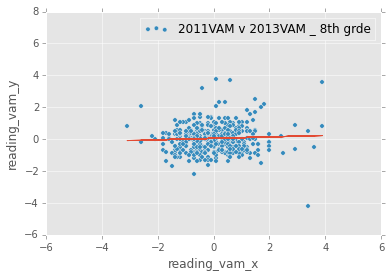

In [8]:
# different way, assign x and y
x = result['reading_vam_x']
y = result['reading_vam_y']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='reading_vam_x', y='reading_vam_y',label="2011VAM v 2013VAM _ 8th grde")
plt.ylim(-6, 8)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.813
Date:                Mon, 17 Aug 2015   Prob (F-statistic):            0.00938
Time:                        15:20:30   Log-Likelihood:                -552.80
No. Observations:                 415   AIC:                             1110.
Df Residuals:                     413   BIC:                             1118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0330      0.045     -0.731      0.465        -0.122     0.056
x              0.1129      0.043      2.610      0.009         0.028     0.198
==============================================================================
Omnibus:                       24.798   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.804
Skew:                          -0.114   Prob(JB):                     2.10e-17
Kurtosis:                       5.095   Cond. No.                         1.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

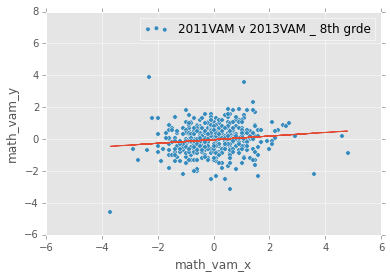

In [9]:
# different way, assign x and y
x = result['math_vam_x']
y = result['math_vam_y']

# that's a tilde
lm = smf.ols(formula='y ~ x', data=result).fit()

result.plot(kind='scatter', x='math_vam_x', y='math_vam_y',label="2011VAM v 2013VAM _ 8th grde")
plt.ylim(-6, 8)
plt.xlim(-6, 6)
plt.legend()
# plots the trendline
plt.plot(x, lm.params.x*x + lm.params.Intercept, '-')

lm.summary()